# Verifica di Microrobotica: machine learning

### Gabriele Ferrero

## Esercizio 1: concessionario di auto
Un venditore di automobili vuole classificare i suoi pontenziali clienti in due categorie: quelli che  vogliono acquistare un SUV e quelli che non lo acquisterebbero mai. Ti commissiona un algoritmo di machine learning che sia adatto allo scopo e ti fornisce il dataset storico degli acquirenti nel file `SUV_Purchase.csv` che contiene: 
* `User ID`: l'identificativo dei clienti
* `Gender`: il sesso dei clienti
* `Age`: l'età anagrafica dei clienti
* `EstimatedSalary`: il salario annuo dei clienti
* `Purchased` che vale 1 se il cliente acquista un SUV, 0 altrimenti.

Realizza un algoritmo di machine learning di tipo MultiLayer Perceptron adatto allo scopo. **Segui tutte le fasi previste per la creazione di un algoritmo di machine learning e qualora certe fasi non siano utili, spegane il motivo. Motiva anche la scelta delle feature.**

PS: non è dato sapere se il concessionario di auto voglia vendere più SUV oppure se non sopporti i SUV...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns

### 1) SCELTA DEI DATI

In [2]:
data_suv = pd.read_csv("./SUV_Purchase.csv")
data_suv.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### 2) ANALISI, PULIZIA E PREPARAZIONE DATI

#### 2.1) ANALISI

In [3]:
data_suv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


#### 2.2) SELEZIONE DELLE VARIABILI FEATURES E TARGET

In [4]:
features_suv = ["Gender", "Age", "EstimatedSalary"]
target_suv = "Purchased"

# CONSIDERAZIONI:
# - in questo caso non scelgo la colonna "User ID" perché è un dato che non è correlato con la scelta
#   che può fare un utente

#### 2.3) PULIZIA

In [5]:
# non si fa perché non sono presenti dati mancanti

#### 2.4) PREPARAZIONE

In [6]:
# trasformo il gender in numeri
labelencoder_gender = preprocessing.LabelEncoder()
labelencoder_gender.fit(data_suv["Gender"])
data_suv["Gender"] = labelencoder_gender.transform(data_suv["Gender"])
print(labelencoder_gender.classes_)


# normalizzo le features 
scaler_suv = StandardScaler()
scaler_suv.fit(data_suv[features_suv])
data_suv[features_suv] = scaler_suv.transform(data_suv[features_suv])


data_suv.head()

['Female' 'Male']


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1.020204,-1.781797,-1.490046,0
1,15810944,1.020204,-0.253587,-1.460681,0
2,15668575,-0.980196,-1.113206,-0.785290,0
3,15603246,-0.980196,-1.017692,-0.374182,0
4,15804002,1.020204,-1.781797,0.183751,0


#### 2.5) ANALISI FEATURES

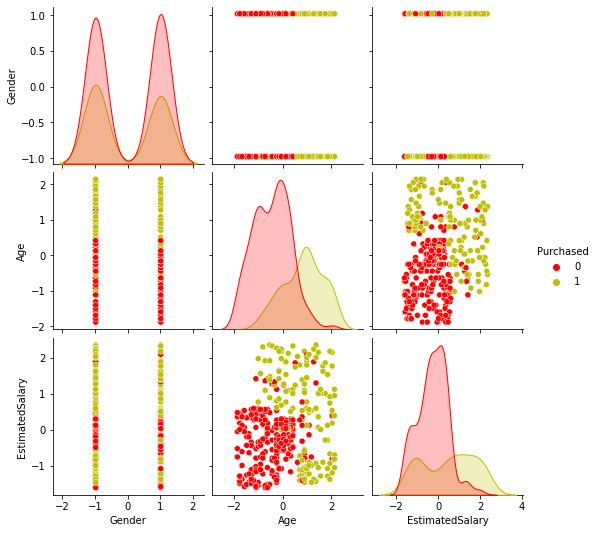

In [7]:
sns_plot = sns.pairplot(data_suv, hue=target_suv, palette=["r","y"], vars=features_suv)

### 3) SUDDIVIDERE I DATI

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data_suv[features_suv], 
                                                    data_suv[target_suv], 
                                                    train_size=0.7, 
                                                    random_state=0)

print(f"X_test: {X_test}\n")
print(f"y_test: {y_test}\n")

X_test:        Gender       Age  EstimatedSalary
132  1.020204 -0.731153         0.506764
309 -0.980196  0.032952        -0.579736
341  1.020204 -0.253587         0.154386
196 -0.980196 -0.731153         0.271845
246 -0.980196 -0.253587        -0.579736
..        ...       ...              ...
216  1.020204  1.083596        -0.139263
259 -0.980196  0.701544         1.798818
49  -0.980196 -0.635640         0.565494
238 -0.980196  0.797057         0.359940
343 -0.980196  0.892570        -0.550371

[120 rows x 3 columns]

y_test: 132    0
309    0
341    0
196    0
246    0
      ..
216    0
259    1
49     0
238    0
343    1
Name: Purchased, Length: 120, dtype: int64



### 4) SCELTA DEL MODELLO

In [9]:
# come su richiesta del cliente si usa una rete neurale

### 5) ADDESTRAMENTO MODELLO

In [10]:
classificatore_suv = MLPClassifier(hidden_layer_sizes=(10, 10, 10),
                    solver='sgd',
                    learning_rate_init=0.01,
                    max_iter=100,
                    random_state=113)



classificatore_suv.fit(X_train,y_train)
print(f"Accuratezza TRAINING: {classificatore_suv.score(X_train,y_train):.3f}")
print(f"Accuratezza TEST: {classificatore_suv.score(X_test,y_test):.3f}")

Accuratezza TRAINING: 0.921
Accuratezza TEST: 0.917


/home/gabriele/Applicazioni/Anaconda3/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


### 6) TESTARE IL MODELLO

In [11]:
test_cliente = np.array([[0,25,3000]])
test_cliente_scaled = scaler_suv.transform(test_cliente)
test_cliente_scaled

array([[-0.98019606, -1.20871865, -1.95988394]])

In [12]:
prediction_suv = classificatore_suv.predict(test_cliente_scaled)
prediction_suv

array([0])

### 7) VALUTAZIONE DEL MODELLO E MIGLIORAMENTI

In [13]:
# vedendo i risultati ritengo che siano accettabili

### 8) SALVATAGGIO DEL MODELLO

In [14]:
# in questo esercizio non è richiesto il salvataggio

## Esercizio 2: riconoscitore di banconote false
![Riconoscitore di banconote false](rbf.jpeg)
Il dataset `banknotes.csv` contiene le misure geometriche di precisione di 200 banconote (` Lengt`,`Right`,`Bottom`,`Top`,`Diagonal`). Inoltre la colonna `conterfeit` vale 1 se la banconota è contraffatta. Si vuole implementare un algoritmo in grado di eseguire su di una macchinetta portatile con bassa potenza di calcolo ma che abbia il 100% di accuratezza. Realizza un classificatore random forest adatto allo scopo e:
* calcola la profondità minima degli alberi che permetta un'accuratezza del 100%
* calcola l'importanza delle diverse feature
* riaddrestra il modello facendo uso delle feature che rilevi come quelle più importanti.

**Segui tutte le fasi previste per la creazione di un algoritmo di machine**

In [15]:
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### 1) SCELTA DEI DATI

In [16]:
data_banconote = pd.read_csv("./banknotes.csv")
data_banconote.head()

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
0,0,214.8,131.0,131.1,9.0,9.7,141.0
1,0,214.6,129.7,129.7,8.1,9.5,141.7
2,0,214.8,129.7,129.7,8.7,9.6,142.2
3,0,214.8,129.7,129.6,7.5,10.4,142.0
4,0,215.0,129.6,129.7,10.4,7.7,141.8


### 2) ANALISI, PULIZIA E PREPARAZIONE DATI

#### 2.1) ANALISI

In [17]:
data_banconote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   conterfeit  200 non-null    int64  
 1   Length      200 non-null    float64
 2   Left        200 non-null    float64
 3   Right       200 non-null    float64
 4   Bottom      200 non-null    float64
 5   Top         200 non-null    float64
 6   Diagonal    200 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 11.1 KB


#### 2.2) SELEZIONE DELLE VARIABILI FEATURES E TARGET

In [18]:
features_banconote = ["Length", "Left", "Right", "Bottom", "Top", "Diagonal"]
target_banconote = "conterfeit"

# CONSIDERAZIONI:
# - 

#### 2.3) PULIZIA

In [19]:
# non si fa perché non sono presenti dati mancanti

#### 2.4) PREPARAZIONE

In [20]:
# normalizzo le features 
scaler_banconote = StandardScaler()
scaler_banconote.fit(data_banconote[features_banconote])
data_banconote[features_banconote] = scaler_banconote.transform(data_banconote[features_banconote])


data_banconote.head()

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
0,0,-0.255583,2.439452,2.837043,-0.289732,-1.186735,0.449372
1,0,-0.788048,-1.170437,-0.636381,-0.914304,-1.436443,1.058395
2,0,-0.255583,-1.170437,-0.636381,-0.497923,-1.311589,1.493412
3,0,-0.255583,-1.170437,-0.884483,-1.330685,-0.312759,1.319405
4,0,0.276882,-1.448121,-0.636381,0.681824,-3.683811,1.145399


#### 2.5) ANALISI FEATURES

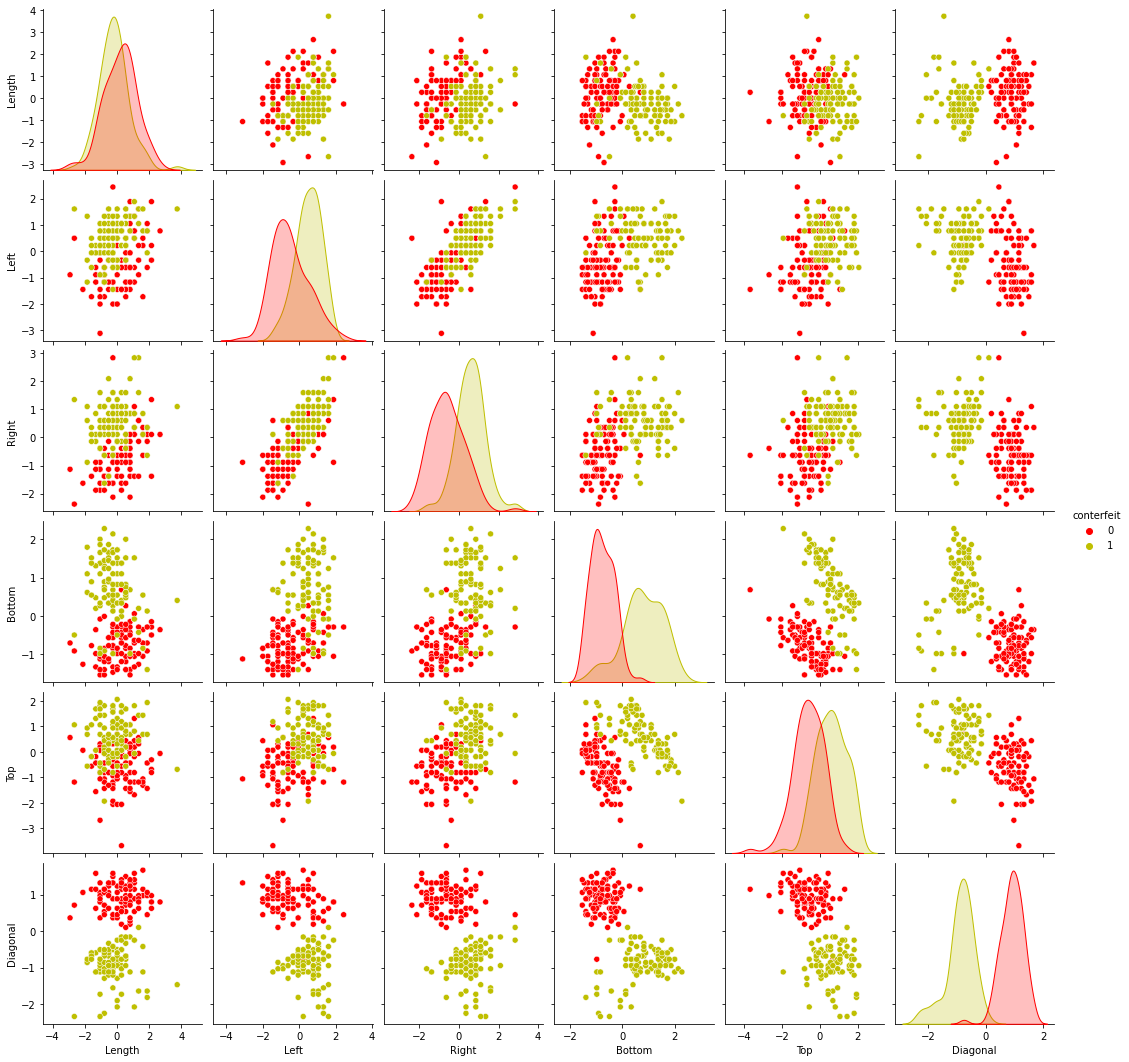

In [21]:
sns_plot = sns.pairplot(data_banconote, hue=target_banconote, palette=["r","y"], vars=features_banconote)


# CONSIDERAZIONI:
# - vedendo i grafici si può già capire che la diagonale è un dato molto importante (perché permette 
#   una migliore e netta divisione)

### 3) SUDDIVIDERE I DATI

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data_banconote[features_banconote], 
                                                    data_banconote[target_banconote], 
                                                    train_size=0.7, 
                                                    random_state=0)

print(f"X_test: {X_test}\n")
print(f"y_test: {y_test}\n")

X_test:        Length      Left     Right    Bottom       Top  Diagonal
18   0.809347 -1.448121 -0.884483 -1.400082  1.060633  0.884389
170 -2.651676  1.606401  1.348433 -0.497923  1.060633 -2.334734
107 -0.255583 -0.059702  1.100331  0.265443  1.060633 -0.507664
98   0.543114 -0.337386 -0.388279 -0.220335 -0.562466  0.884389
177 -1.054281  0.773349  0.107924  0.334840  1.684902 -0.768674
182  0.276882  1.051033  0.356026  1.098206  0.935779 -1.029684
5    2.140510  1.884084  1.348433 -0.289732 -0.687320  0.797385
146  0.276882  1.051033  1.100331  1.375793  0.061803 -0.507664
12   0.809347  1.884084 -0.884483 -1.053098  0.186656  0.797385
152 -0.788048 -1.170437 -1.628788  0.681824  0.436364 -1.029684
61   1.075579 -1.170437 -1.380686 -1.330685 -0.187905  0.884389
125  0.010649 -0.337386  0.852229  0.543031  0.935779 -0.768674
180  0.276882  0.773349  0.356026  1.375793  0.061803 -1.203691
154 -1.054281  0.495666  0.107924  1.098206  1.060633 -0.855678
80   0.543114 -1.170437 -0.63638

### 4) SCELTA DEL MODELLO

In [23]:
# come richiesto dall'esercizio si userà una random forest

### 5) ADDESTRAMENTO MODELLO

In [30]:
profondita = 1

for i in range(1,20):
    foresta_banconote = RandomForestClassifier(max_depth=i, n_estimators=100)
    foresta_banconote.fit(X_train, y_train)
    
    if foresta_banconote.score(X_train, y_train) == 1.0 and foresta_banconote.score(X_test, y_test) == 1.0:
        profondita = i
        break

profondita

5

### 6) TESTARE IL MODELLO

In [31]:
test_banconota = np.array([[214, 130, 130 , 10, 10, 141]])
test_banconota_scaled = scaler_banconote.transform(test_banconota)
test_banconota_scaled

array([[-2.38544346, -0.3373858 ,  0.10792425,  0.4042368 , -0.81217395,
         0.44937213]])

In [32]:
predict_banconota = foresta_banconote.predict(test_banconota)
predict_banconota

array([0])

### 7) VALUTAZIONE DEL MODELLO E MIGLIORAMENTI

#### 7.1) VALUTAZIONE DELLE FEATURES

Feature: Length, Score: 0.01182014281445914
Feature: Left, Score: 0.02573280726112851
Feature: Right, Score: 0.0762003217195091
Feature: Bottom, Score: 0.2652351452663231
Feature: Top, Score: 0.1035723919333785
Feature: Diagonal, Score: 0.5174391910052017


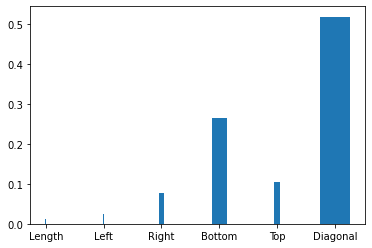

In [33]:
# get importance
importance = foresta_banconote.feature_importances_
# summarize feature importance
for i,v in zip(features_banconote, importance):
    print(f'Feature: {i}, Score: {v}')
# plot feature importance
plt.bar(features_banconote, [x for x in importance], importance)
plt.show()


# CONSIDERAZIONI:
# - come già intuito precedentemente dai grafici la diagonale è una features molto importante

#### 7.2) RIADDESTRAMENTO

In [34]:
# Sulla base dell'importanza delle features riaddestro il modello tenendo solo più conto di: "Bottom" e 
# "Diagonal"

new_features = ["Bottom", "Diagonal"]

X_train, X_test, y_train, y_test = train_test_split(data_banconote[new_features], 
                                                    data_banconote[target_banconote], 
                                                    train_size=0.7, 
                                                    random_state=0)

#print(f"X_test: {X_test}\n")
#print(f"y_test: {y_test}\n")

profondita = 1
for i in range(1,20):
    foresta_banconote = RandomForestClassifier(max_depth=i, n_estimators=100)
    foresta_banconote.fit(X_train, y_train)
    
    if foresta_banconote.score(X_train, y_train) == 1.0 and foresta_banconote.score(X_test, y_test) == 1.0:
        profondita = i
        break

print(profondita)

# CONSIDERAZIONI:
# - si può notare che la profondità richiesta per raggiungere il 100% di accuratezza risulti minore (essendoci
#   basati su features di buona qualità)

3


### 8) SALVATAGGIO DEL MODELLO

In [35]:
# in questo esercizio non è richiesto il salvataggio